# Ex 2

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


In [2]:
data1 = pd.read_csv('data_linear.csv')
data1

,Diện tích,Giá
0,30.0000,448.524
1,32.4138,509.248
2,34.8276,535.104
3,37.2414,551.432
4,39.6552,623.418
5,42.0690,625.992
6,44.4828,655.248
7,46.8966,701.377
8,49.3103,748.918
9,51.7241,757.881


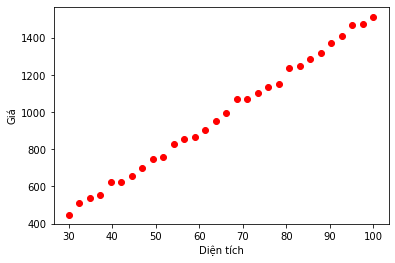

In [3]:
# Dien Tich
X = data1['Diện tích']
# Price
y = data1['Giá']
# Visualize data 
plt.plot(X, y, 'ro')
plt.xlabel('Diện tích')
plt.ylabel('Giá')
plt.show()

## Linear Regression (Giá nhà) = w_1*(Diện Tích) + w_0

In [4]:
# Building X with 2 columns are 1 and x1 to xn
X1 = X.values.reshape(-1, 1)
one = np.ones((len(X), 1))
X_new = np.concatenate((one, X1), axis = 1)


In [5]:
# Calculating we of the fitting line 
XT_X = np.dot(X_new.T, X_new)
XT_t = np.dot(X_new.T, y)
w = np.dot(np.linalg.pinv(XT_X), XT_t)
w

array([-7.06426865, 15.2110908 ])

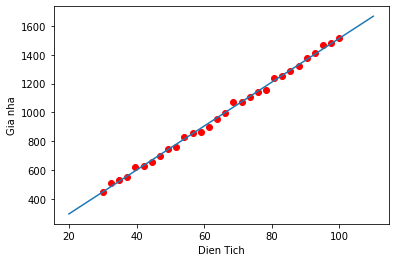

In [6]:
# Preparing the fitting line 
w_0 = w[0]
w_1 = w[1]
x0 = np.linspace(20,110,2)
y0 = w_0 + w_1*x0

# Drawing the fitting line 
plt.plot(X, y, 'ro')     # data 
plt.plot(x0, y0)               # the fitting line
plt.xlabel('Dien Tich')
plt.ylabel('Gia nha')
plt.show()

In [7]:
y1 = round(w_1*50 + w_0,2)
y2 = round(w_1*100 + w_0,2)
y3 = round(w_1*150 + w_0,2)

print(f'Predicted Price Values Respectively \n {y1}\n {y2} \n {y3}')

Predicted Price Values Respectively 
 753.49
 1514.04 
 2274.6


# Ex 3

ZN: proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS: proportion of non-retail business acres per town

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX: nitric oxides concentration (parts per 10 million)
1https://archive.ics.uci.edu/ml/datasets/Housing
123
20.2. Load the Dataset 124

RM: average number of rooms per dwelling

AGE: proportion of owner-occupied units built prior to 1940

DIS: weighted distances to ﬁve Boston employment centers

RAD: index of accessibility to radial highways

TAX: full-value property-tax rate per $10,000

PTRATIO: pupil-teacher ratio by town 12. B: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town 13. LSTAT: % lower status of the population

MEDV: Median value of owner-occupied homes in $1000s


In [8]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data_3 = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)
data_3.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [9]:
size = np.shape(data_3)
size

(506, 14)

In [10]:
#split into train and test data
train_data = data_3.iloc[:500]
test_data = data_3.iloc[500:size[0]]

In [11]:
X_data = train_data.drop(columns='MEDV')
Y_data = train_data[['MEDV']]



## Linear Regression

In [12]:
# Attribute in Model 
X = X_data.values
one = np.ones((train_data.shape[0], 1))
X1 = np.concatenate((one, X), axis = 1)
X1

array([[1.0000e+00, 6.3200e-03, 1.8000e+01, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [1.0000e+00, 2.7310e-02, 0.0000e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [1.0000e+00, 2.7290e-02, 0.0000e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [1.0000e+00, 2.6838e-01, 0.0000e+00, ..., 1.9200e+01, 3.9690e+02,
        1.4100e+01],
       [1.0000e+00, 2.3912e-01, 0.0000e+00, ..., 1.9200e+01, 3.9690e+02,
        1.2920e+01],
       [1.0000e+00, 1.7783e-01, 0.0000e+00, ..., 1.9200e+01, 3.9577e+02,
        1.5100e+01]])

In [13]:
# calculate w 
XT_X = np.dot(X1.T, X1)
XT_t = np.dot(X1.T, Y_data.values)
w = np.dot(np.linalg.pinv(XT_X), XT_t)
w

array([[ 3.54068339e+01],
       [-1.05855998e-01],
       [ 4.87517296e-02],
       [ 1.82934523e-02],
       [ 2.61119923e+00],
       [-1.70062416e+01],
       [ 3.79736168e+00],
       [ 2.02008117e-03],
       [-1.51449492e+00],
       [ 2.90883354e-01],
       [-1.25645889e-02],
       [-8.85637329e-01],
       [ 9.29626996e-03],
       [-5.38781881e-01]])

## Model after estimating w

In [14]:
linear_regression_func = 'MEDV_hat = '
for i in range(len(w)):
    if i == 0:
        linear_regression_func += f'{w[i]} +'
    else:
        linear_regression_func += f'{w[i]}{column_names[i-1]} +'
linear_regression_func

'MEDV_hat = [35.40683395] +[-0.105856]CRIM +[0.04875173]ZN +[0.01829345]INDUS +[2.61119923]CHAS +[-17.00624156]NOX +[3.79736168]RM +[0.00202008]AGE +[-1.51449492]DIS +[0.29088335]RAD +[-0.01256459]TAX +[-0.88563733]PTRATIO +[0.00929627]B +[-0.53878188]LSTAT +'

## Testing for test_data

In [20]:
# Actual data 
actual_data = test_data['MEDV']
actual_data

array([16.8, 22.4, 20.6, 23.9, 22. , 11.9])

In [ ]:
actual_data.values

In [16]:
test_data = test_data.drop(columns='MEDV')
# chuyen ve ma tran co them cot 1
one_test = np.ones((test_data.shape[0], 1))
test_data_x = np.concatenate((one_test, test_data.values), axis = 1)

In [17]:
testing = np.dot(test_data_x,w)
testing

array([[20.67313667],
       [23.99202547],
       [22.86600965],
       [28.17894777],
       [26.65926677],
       [22.84943851]])

## Difference between y(x,w) and p(t|x,w,B^-1)

In [25]:
difference = [abs(actual_data.values[i]-testing[i]) for i in range(len(testing))]
difference

[array([3.87313667]),
 array([1.59202547]),
 array([2.26600965]),
 array([4.27894777]),
 array([4.65926677]),
 array([10.94943851])]